# Traditional Ways for similarity search

- Jaccard Similarity
- W-Shingling
- Levenshtein


## Jaccard Similarity

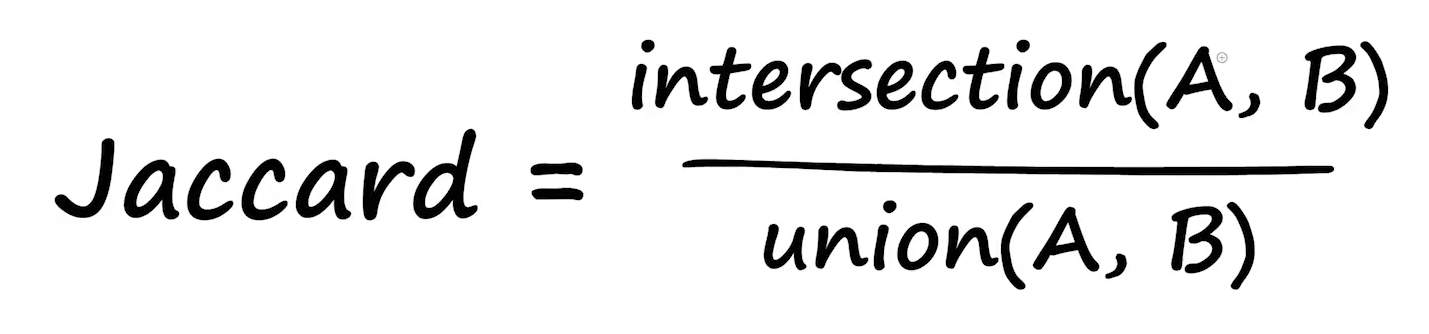

Jaccard similarity (also known as the Jaccard index or Jaccard coefficient) is a statistic used for measuring the similarity and diversity of sample sets. It's defined as the size of the intersection divided by the size of the union of the sample sets.

### Mathematical Definition

For two sets A and B, the Jaccard similarity J(A,B) is defined as:

$$J(A,B) = \frac{|A \cap B|}{|A \cup B|} = \frac{|A \cap B|}{|A| + |B| - |A \cap B|}$$

Where:
- |A ∩ B| is the size of the intersection of sets A and B
- |A ∪ B| is the size of the union of sets A and B

The Jaccard similarity ranges from 0 to 1:
- 0: The sets have no elements in common
- 1: The sets are identical

### Python Implementation

Let's implement Jaccard similarity for different data types:


In [2]:
# Basic implementation for sets
def jaccard_similarity_sets(set1, set2):
    """
    Calculate Jaccard similarity between two sets.

    Parameters:
    -----------
    set1, set2 : set
        The sets to compare

    Returns:
    --------
    float
        Jaccard similarity coefficient
    """
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))

    # Avoid division by zero
    if union == 0:
        return 0

    return intersection / union

# Example with sets
set_a = {'apple', 'banana', 'orange', 'grape'}
set_b = {'apple', 'banana', 'pear', 'kiwi'}

print(f"Set A: {set_a}")
print(f"Set B: {set_b}")
print(f"Jaccard similarity: {jaccard_similarity_sets(set_a, set_b):.4f}")


Set A: {'grape', 'apple', 'orange', 'banana'}
Set B: {'apple', 'pear', 'kiwi', 'banana'}
Jaccard similarity: 0.3333


In [3]:
# Implementation for text documents (using word tokenization)
import re

def jaccard_similarity_text(text1, text2):
    """
    Calculate Jaccard similarity between two text documents.

    Parameters:
    -----------
    text1, text2 : str
        The text documents to compare

    Returns:
    --------
    float
        Jaccard similarity coefficient
    """
    # Simple tokenization (convert to lowercase and split by non-alphanumeric characters)
    words1 = set(re.findall(r'\w+', text1.lower()))
    words2 = set(re.findall(r'\w+', text2.lower()))

    return jaccard_similarity_sets(words1, words2)

# Example with text
doc1 = "Jaccard similarity is used to measure the similarity between two sets."
doc2 = "The Jaccard coefficient measures similarity between finite sets."

print(f"Document 1: {doc1}")
print(f"Document 2: {doc2}")
print(f"Jaccard similarity: {jaccard_similarity_text(doc1, doc2):.4f}")


Document 1: Jaccard similarity is used to measure the similarity between two sets.
Document 2: The Jaccard coefficient measures similarity between finite sets.
Jaccard similarity: 0.3846


In [4]:
# Implementation for binary vectors
import numpy as np

def jaccard_similarity_binary(vec1, vec2):
    """
    Calculate Jaccard similarity between two binary vectors.

    Parameters:
    -----------
    vec1, vec2 : array-like
        Binary vectors (containing only 0s and 1s)

    Returns:
    --------
    float
        Jaccard similarity coefficient
    """
    vec1 = np.asarray(vec1, dtype=bool)
    vec2 = np.asarray(vec2, dtype=bool)

    intersection = np.logical_and(vec1, vec2).sum()
    union = np.logical_or(vec1, vec2).sum()

    # Avoid division by zero
    if union == 0:
        return 0

    return intersection / union

# Example with binary vectors
binary_vec1 = [1, 0, 1, 1, 0, 1]
binary_vec2 = [1, 1, 0, 1, 0, 0]

print(f"Binary vector 1: {binary_vec1}")
print(f"Binary vector 2: {binary_vec2}")
print(f"Jaccard similarity: {jaccard_similarity_binary(binary_vec1, binary_vec2):.4f}")


Binary vector 1: [1, 0, 1, 1, 0, 1]
Binary vector 2: [1, 1, 0, 1, 0, 0]
Jaccard similarity: 0.4000


### Applications of Jaccard Similarity

Jaccard similarity is widely used in various domains:

1. **Information Retrieval**: Measuring document similarity, search relevance, and recommendation systems.

2. **Natural Language Processing**: 
   - Document clustering
   - Plagiarism detection
   - Text similarity analysis

3. **Bioinformatics**:
   - Comparing gene sets
   - Analyzing species diversity
   - Measuring similarity between biological samples

4. **Data Mining**:
   - Collaborative filtering
   - Association rule mining
   - Anomaly detection

5. **Image Analysis**:
   - Comparing image features
   - Object recognition
   - Image retrieval


### Advantages and Limitations

#### Advantages:
- **Simplicity**: Easy to understand and implement
- **Normalization**: Results are normalized between 0 and 1
- **Set-based**: Works well for categorical data and sparse binary data
- **Efficiency**: Computationally efficient for sparse data

#### Limitations:
- **Binary nature**: Only considers presence/absence, not frequency or magnitude
- **Sensitivity to outliers**: A single unusual element can significantly affect the similarity score
- **Equal weighting**: All elements are treated with equal importance
- **Not suitable for continuous data**: Requires conversion to binary/categorical form


### Jaccard Distance

The Jaccard distance is a complementary measure to the Jaccard similarity:

$$d_J(A,B) = 1 - J(A,B) = \frac{|A \cup B| - |A \cap B|}{|A \cup B|}$$

It measures the dissimilarity between sets, ranging from 0 (identical) to 1 (completely different).


In [5]:
# Example of Jaccard distance
def jaccard_distance(set1, set2):
    """Calculate the Jaccard distance between two sets."""
    return 1 - jaccard_similarity_sets(set1, set2)

print(f"Jaccard distance between set_a and set_b: {jaccard_distance(set_a, set_b):.4f}")


Jaccard distance between set_a and set_b: 0.6667


### Weighted Jaccard Similarity

For cases where elements have different importance, a weighted version can be used:

$$J_w(A,B) = \frac{\sum_{i \in A \cap B} \min(w_A(i), w_B(i))}{\sum_{i \in A \cup B} \max(w_A(i), w_B(i))}$$

Where $w_A(i)$ and $w_B(i)$ are the weights of element $i$ in sets A and B respectively.


In [6]:
# Implementation of weighted Jaccard similarity
def weighted_jaccard_similarity(dict1, dict2):
    """
    Calculate weighted Jaccard similarity between two dictionaries.

    Parameters:
    -----------
    dict1, dict2 : dict
        Dictionaries with elements as keys and weights as values

    Returns:
    --------
    float
        Weighted Jaccard similarity coefficient
    """
    # Get all unique keys
    all_keys = set(dict1.keys()).union(set(dict2.keys()))

    # Calculate numerator (sum of minimum weights for common elements)
    numerator = sum(min(dict1.get(k, 0), dict2.get(k, 0)) for k in all_keys)

    # Calculate denominator (sum of maximum weights for all elements)
    denominator = sum(max(dict1.get(k, 0), dict2.get(k, 0)) for k in all_keys)

    # Avoid division by zero
    if denominator == 0:
        return 0

    return numerator / denominator

# Example with weighted sets (represented as dictionaries)
weighted_set1 = {'apple': 0.5, 'banana': 0.8, 'orange': 0.3, 'grape': 0.2}
weighted_set2 = {'apple': 0.6, 'banana': 0.4, 'pear': 0.7, 'kiwi': 0.5}

print(f"Weighted set 1: {weighted_set1}")
print(f"Weighted set 2: {weighted_set2}")
print(f"Weighted Jaccard similarity: {weighted_jaccard_similarity(weighted_set1, weighted_set2):.4f}")


Weighted set 1: {'apple': 0.5, 'banana': 0.8, 'orange': 0.3, 'grape': 0.2}
Weighted set 2: {'apple': 0.6, 'banana': 0.4, 'pear': 0.7, 'kiwi': 0.5}
Weighted Jaccard similarity: 0.2903
